<span style="color:orange">
    <h1>In this notebook the one can know more about ways to evaluate the network performance.</h1>
</span>


---
_Bruna Faria. PhD in Computing, Data Science and Engineering._

# Two strategies to evaluate the models grafically:


# 1) Tensorboard:

Using tensorboard we can follow the loss, accuracy, histograms, model grafo, and so on. 


# 2) Metrics from model:

All models save their metrics, which can be accessed to generate simples plots with matplotlib.

In [1]:
# First importing Libraries

import tensorflow as tf

# Datetime to use system date
import datetime

# Extension for TensorBoard
%load_ext tensorboard

In [2]:
# Second, make sure that there aren't log files in the work folder

!rmdir /s /q logs # for windows
#rm -rf ./logs/ # for linux

The system cannot find the file specified.
The system cannot find the file specified.
The system cannot find the file specified.
The system cannot find the file specified.


In [3]:
# Importing the dataset MNIST as example

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing data

x_train = x_train/255.0
x_test = x_test/255.0

print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


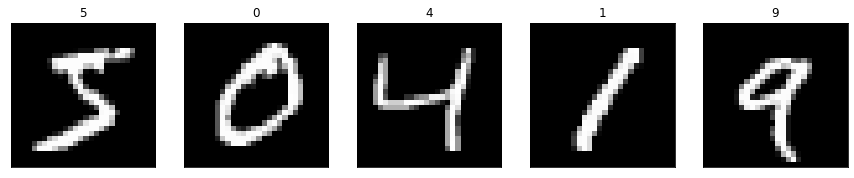

In [4]:
# Visualizing some examples of the dataset

import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(15, 5))

for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
    
plt.show()

> **Here the idea is to evaluate different models to find the best one able to identify the number in the image correctly!**

In [5]:
# Creating the first model without Dropout and using Adam as optimizer

model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])


# Compiling the model

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


>**For better organization of files is very important that the logs contain the date of their generation.**

Then, let's go verify the system date:

In [6]:
datetime.datetime.now().strftime("%Y-%m-%d / %H:%M:%S")

'2021-11-19 / 14:23:57'

> **The generation of a tensorboard callback ensures that records are created and stored correctly during network training!**

__Usage:__

    tf.keras.callbacks.TensorBoard(log_dir="path/directory", histogram_freq=1)

**Tips and Tricks:**

- Defining histogram_freq=1, the one is ensuring that the histogram will be calculated in each epoch and then returning one more object to evaluate the network. 


- For each different models you should define the tensorboard callback again!

In [7]:
# Defining the callback for the first model:

log_dir1 = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") #path of the records

tensorboard_callback1 = tf.keras.callbacks.TensorBoard(log_dir=log_dir1, histogram_freq=1)

print('Folder path of the records for the first model: ', log_dir1)

Folder path of the records for the first model:  logs/fit/20211119-142400


In [8]:
# Training the first model

history1 = model1.fit(x=x_train, 
                      y=y_train, 
                      epochs=10,
                      validation_data=(x_test, y_test),
                      callbacks=[tensorboard_callback1])

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2013 - accuracy: 0.9397 - val_loss: 0.1069 - val_accuracy: 0.9665
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0813 - accuracy: 0.9748 - val_loss: 0.0738 - val_accuracy: 0.9757
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0535 - accuracy: 0.9833 - val_loss: 0.0818 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0380 - accuracy: 0.9879 - val_loss: 0.0710 - val_accuracy: 0.9785
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0272 - accuracy: 0.9911 - val_loss: 0.0772 - val_accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0221 - accuracy: 0.9929 - val_loss: 0.0737 - val_accuracy: 0.9772
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0168 - accuracy: 0.9945 - val_loss: 0.0835 - val_accuracy:

#### Evaluating the performance with Tensorboard:

In [10]:
# Starting the records made by the tensorboard:
    
%tensorboard --logdir logs/fit --host localhost

<h3>Interpreting the Tensorboard results:</h3>


- 1) Scalars show for us the plots for all metrics that the model was compiled, including the loss. With these plots, we can evaluate the loss, accuracy, and so on, as well as verify the effectiveness of the learning rate used. Also, verifying the stability of the model according to the number of epoch and possible overfitting.


- 2) Graphs show the path realized by the algorithm to solve the problem as well as the data and operation flux.


- 3) Distributions and Histograms allow us to follow the tensor distribution according to epochs which is great to analyze the weights and biases updating. 




<span style="color:red;font-family:arial; font-weight:bold; font-size:1em"> Remember that the Tensorboard is an interactive tools! </span>


Extra links to study: 

https://www.tensorflow.org/tensorboard/get_started

https://medium.com/neuronio-br/utilizando-o-tensorboard-874cab437042

#### Evaluating the performance with Simple plots:

In [11]:
# Displaying the metrics keys saved by the model1

history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

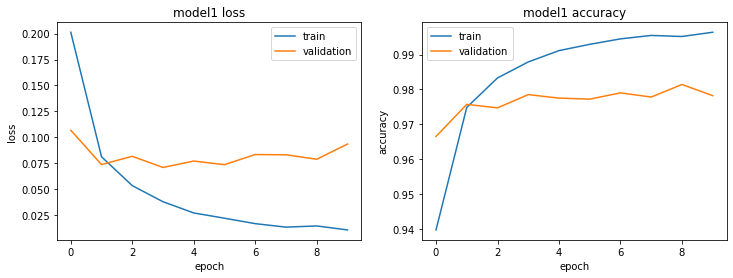

In [12]:
# Evaluating the performance of model1 with plots

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2,figsize=[12,4])

axs[0].plot(history1.history['loss'], label='train')
axs[0].plot(history1.history['val_loss'], label='validation')
axs[0].set_title('model1 loss')
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].legend()

axs[1].plot(history1.history['accuracy'], label='train')
axs[1].plot(history1.history['val_accuracy'], label='validation')
axs[1].set_title('model1 accuracy')
axs[1].set_ylabel('accuracy')
axs[1].set_xlabel('epoch')
axs[1].legend()

**What are your interpretations for such model performance?**

> **Second model:**

In [13]:
# Creating the second model using Dropout and SGD as optimizer

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(28, activation='relu'), #28 instead of 512
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')])


# Compiling the model

model2.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 28)                21980     
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                290       
Total params: 22,270
Trainable params: 22,270
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Creating a specific log for the new model

log_dir2 = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback2 = tf.keras.callbacks.TensorBoard(log_dir=log_dir2, histogram_freq=1)

print('Folder path of the records for the second model: ', log_dir2)

Folder path of the records for the second model:  logs/fit/20211119-142807


In [15]:
# Training writing in the same root path (logs/fit) created before but as new date/time reference

history2 = model2.fit(x=x_train, 
                      y=y_train, 
                      epochs=10,
                      validation_data=(x_test, y_test),
                      callbacks=[tensorboard_callback2])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.8602 - accuracy: 0.7472 - val_loss: 0.4063 - val_accuracy: 0.8920
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4901 - accuracy: 0.8546 - val_loss: 0.3246 - val_accuracy: 0.9103
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4243 - accuracy: 0.8740 - val_loss: 0.2907 - val_accuracy: 0.91840s - loss: 0
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3883 - accuracy: 0.8852 - val_loss: 0.2684 - val_accuracy: 0.9241
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3635 - accuracy: 0.8922 - val_loss: 0.2512 - val_accuracy: 0.9310
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3443 - accuracy: 0.8984 - val_loss: 0.2384 - val_accuracy: 0.9345
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3295 - accuracy: 0.9032 - val_loss: 0.2284 - v

#### Evaluating the performance with Tensorboard:

In [16]:
# Starting the records made by the tensorboard for both models
    
%tensorboard --logdir logs/fit --host localhost #will open all records present in logs/fit

Reusing TensorBoard on port 6006 (pid 3564), started 0:01:15 ago. (Use '!kill 3564' to kill it.)

#### Evaluating the performance with Simple plots:

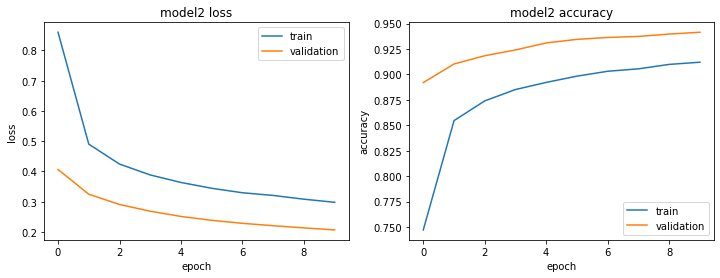

In [17]:
# Evaluating the performance of model 2

fig, axs = plt.subplots(1,2,figsize=[12,4])

axs[0].plot(history2.history['loss'], label='train')
axs[0].plot(history2.history['val_loss'], label='validation')
axs[0].set_title('model2 loss')
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].legend()

axs[1].plot(history2.history['accuracy'], label='train')
axs[1].plot(history2.history['val_accuracy'], label='validation')
axs[1].set_title('model2 accuracy')
axs[1].set_ylabel('accuracy')
axs[1].set_xlabel('epoch')
axs[1].legend()

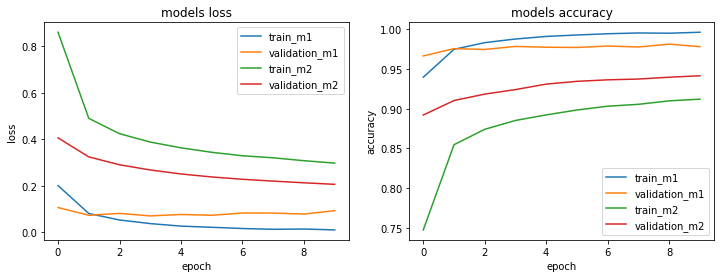

In [18]:
# Plotting both models performance

fig, axs = plt.subplots(1,2,figsize=[12,4])

axs[0].plot(history1.history['loss'], label='train_m1')
axs[0].plot(history1.history['val_loss'], label='validation_m1')
axs[0].plot(history2.history['loss'], label='train_m2')
axs[0].plot(history2.history['val_loss'], label='validation_m2')
axs[0].set_title('models loss')
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].legend()

axs[1].plot(history1.history['accuracy'], label='train_m1')
axs[1].plot(history1.history['val_accuracy'], label='validation_m1')
axs[1].plot(history2.history['accuracy'], label='train_m2')
axs[1].plot(history2.history['val_accuracy'], label='validation_m2')
axs[1].set_title('models accuracy')
axs[1].set_ylabel('accuracy')
axs[1].set_xlabel('epoch')
axs[1].legend()

**What are your interpretations for the models performance?**

**Which is the best one?**

In [19]:
model1.evaluate(x=x_test, y=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0936 - accuracy: 0.9782


[0.09355688840150833, 0.9782000184059143]

In [20]:
model2.evaluate(x=x_test, y=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2066 - accuracy: 0.9415


[0.20661355555057526, 0.9415000081062317]

> **Now, we decide to train again the same model already fitted before, extending the epochs aiming to improve the accuracy. So, in this case, we want extend the log, not create a new!**

In [21]:
# Re-training the model for more 10 epochs using the same tensorboard callback

history3 = model2.fit(x=x_train, 
                      y=y_train, 
                      epochs=15,
                      validation_data=(x_test, y_test),
                      callbacks=[tensorboard_callback2])

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2928 - accuracy: 0.9141 - val_loss: 0.2011 - val_accuracy: 0.9432
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2826 - accuracy: 0.9174 - val_loss: 0.1933 - val_accuracy: 0.9443
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2804 - accuracy: 0.9176 - val_loss: 0.1904 - val_accuracy: 0.9459
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2743 - accuracy: 0.9194 - val_loss: 0.1866 - val_accuracy: 0.9471
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2679 - accuracy: 0.9208 - val_loss: 0.1820 - val_accuracy: 0.9480
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2640 - accuracy: 0.9223 - val_loss: 0.1793 - val_accuracy: 0.9492
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2597 - accuracy: 0.9243 - val_loss: 0.1745 - val_accuracy:

#### Evaluating the performance with Tensorboard:

In [22]:
# Restarting the records made by the tensorboard: previous and actual
    
%tensorboard --logdir logs/fit --host localhost

Reusing TensorBoard on port 6006 (pid 3564), started 0:04:12 ago. (Use '!kill 3564' to kill it.)

#### Evaluating the performance with Simple plots:

In [23]:
history3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

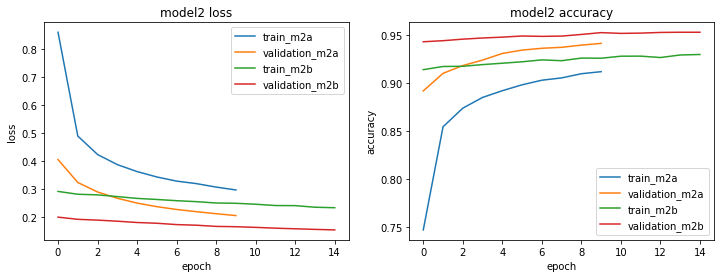

In [24]:
# Plotting both models performance

fig, axs = plt.subplots(1,2,figsize=[12,4])

axs[0].plot(history2.history['loss'], label='train_m2a')
axs[0].plot(history2.history['val_loss'], label='validation_m2a')
axs[0].plot(history3.history['loss'], label='train_m2b')
axs[0].plot(history3.history['val_loss'], label='validation_m2b')
axs[0].set_title('model2 loss')
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].legend()

axs[1].plot(history2.history['accuracy'], label='train_m2a')
axs[1].plot(history2.history['val_accuracy'], label='validation_m2a')
axs[1].plot(history3.history['accuracy'], label='train_m2b')
axs[1].plot(history3.history['val_accuracy'], label='validation_m2b')
axs[1].set_title('model2 accuracy')
axs[1].set_ylabel('accuracy')
axs[1].set_xlabel('epoch')
axs[1].legend()

**What are your interpretations for the models performance?**

**Which improvements do you observe?**

In [25]:
model1.evaluate(x=x_test, y=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0936 - accuracy: 0.9782


[0.09355688840150833, 0.9782000184059143]

In [26]:
model2.evaluate(x=x_test, y=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1555 - accuracy: 0.9531


[0.1555168181657791, 0.9531000256538391]

> **Additional:**

In [27]:
# We can use the following comands to verify the contents of the logs folder:

import os

os.listdir('logs/fit')

['20211119-142400', '20211119-142807']

In [28]:
for i in os.listdir('logs/fit'):
    print(os.listdir('logs/fit/'+i))

['train', 'validation']
['train', 'validation']


In [29]:
for i in os.listdir('logs/fit'):
    for j in ['train', 'validation']:
        path = 'logs/fit/'+i+'/'+j
        print('Contents of the {}'.format(i+'/'+j))
        print(os.listdir(path))

Contents of the 20211119-142400/train
['events.out.tfevents.1637342642.LAPTOP-27L6LR1M.3124.0.v2', 'events.out.tfevents.1637342645.LAPTOP-27L6LR1M.profile-empty', 'plugins']
Contents of the 20211119-142400/validation
['events.out.tfevents.1637342649.LAPTOP-27L6LR1M.3124.1.v2']
Contents of the 20211119-142807/train
['events.out.tfevents.1637342890.LAPTOP-27L6LR1M.3124.2.v2', 'events.out.tfevents.1637342890.LAPTOP-27L6LR1M.profile-empty', 'events.out.tfevents.1637342974.LAPTOP-27L6LR1M.3124.4.v2', 'plugins']
Contents of the 20211119-142807/validation
['events.out.tfevents.1637342896.LAPTOP-27L6LR1M.3124.3.v2', 'events.out.tfevents.1637342978.LAPTOP-27L6LR1M.3124.5.v2']


<span style="color:orange">
    <h1> Now that you learn more about tensorboard and graphics usage to evaluate neural network performance, remember to use it always in your works improving visually your results to get a better work development. </h1>
</span>